<a href="https://colab.research.google.com/github/EVARIST-DEV/EVARIST-DEV.github.io/blob/main/improved_BTC_USD_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install yfinance

In [36]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [37]:
BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2025-08-31', interval='1d')

/tmp/ipython-input-2750809313.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2025-08-31', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [38]:
BTC_USD.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


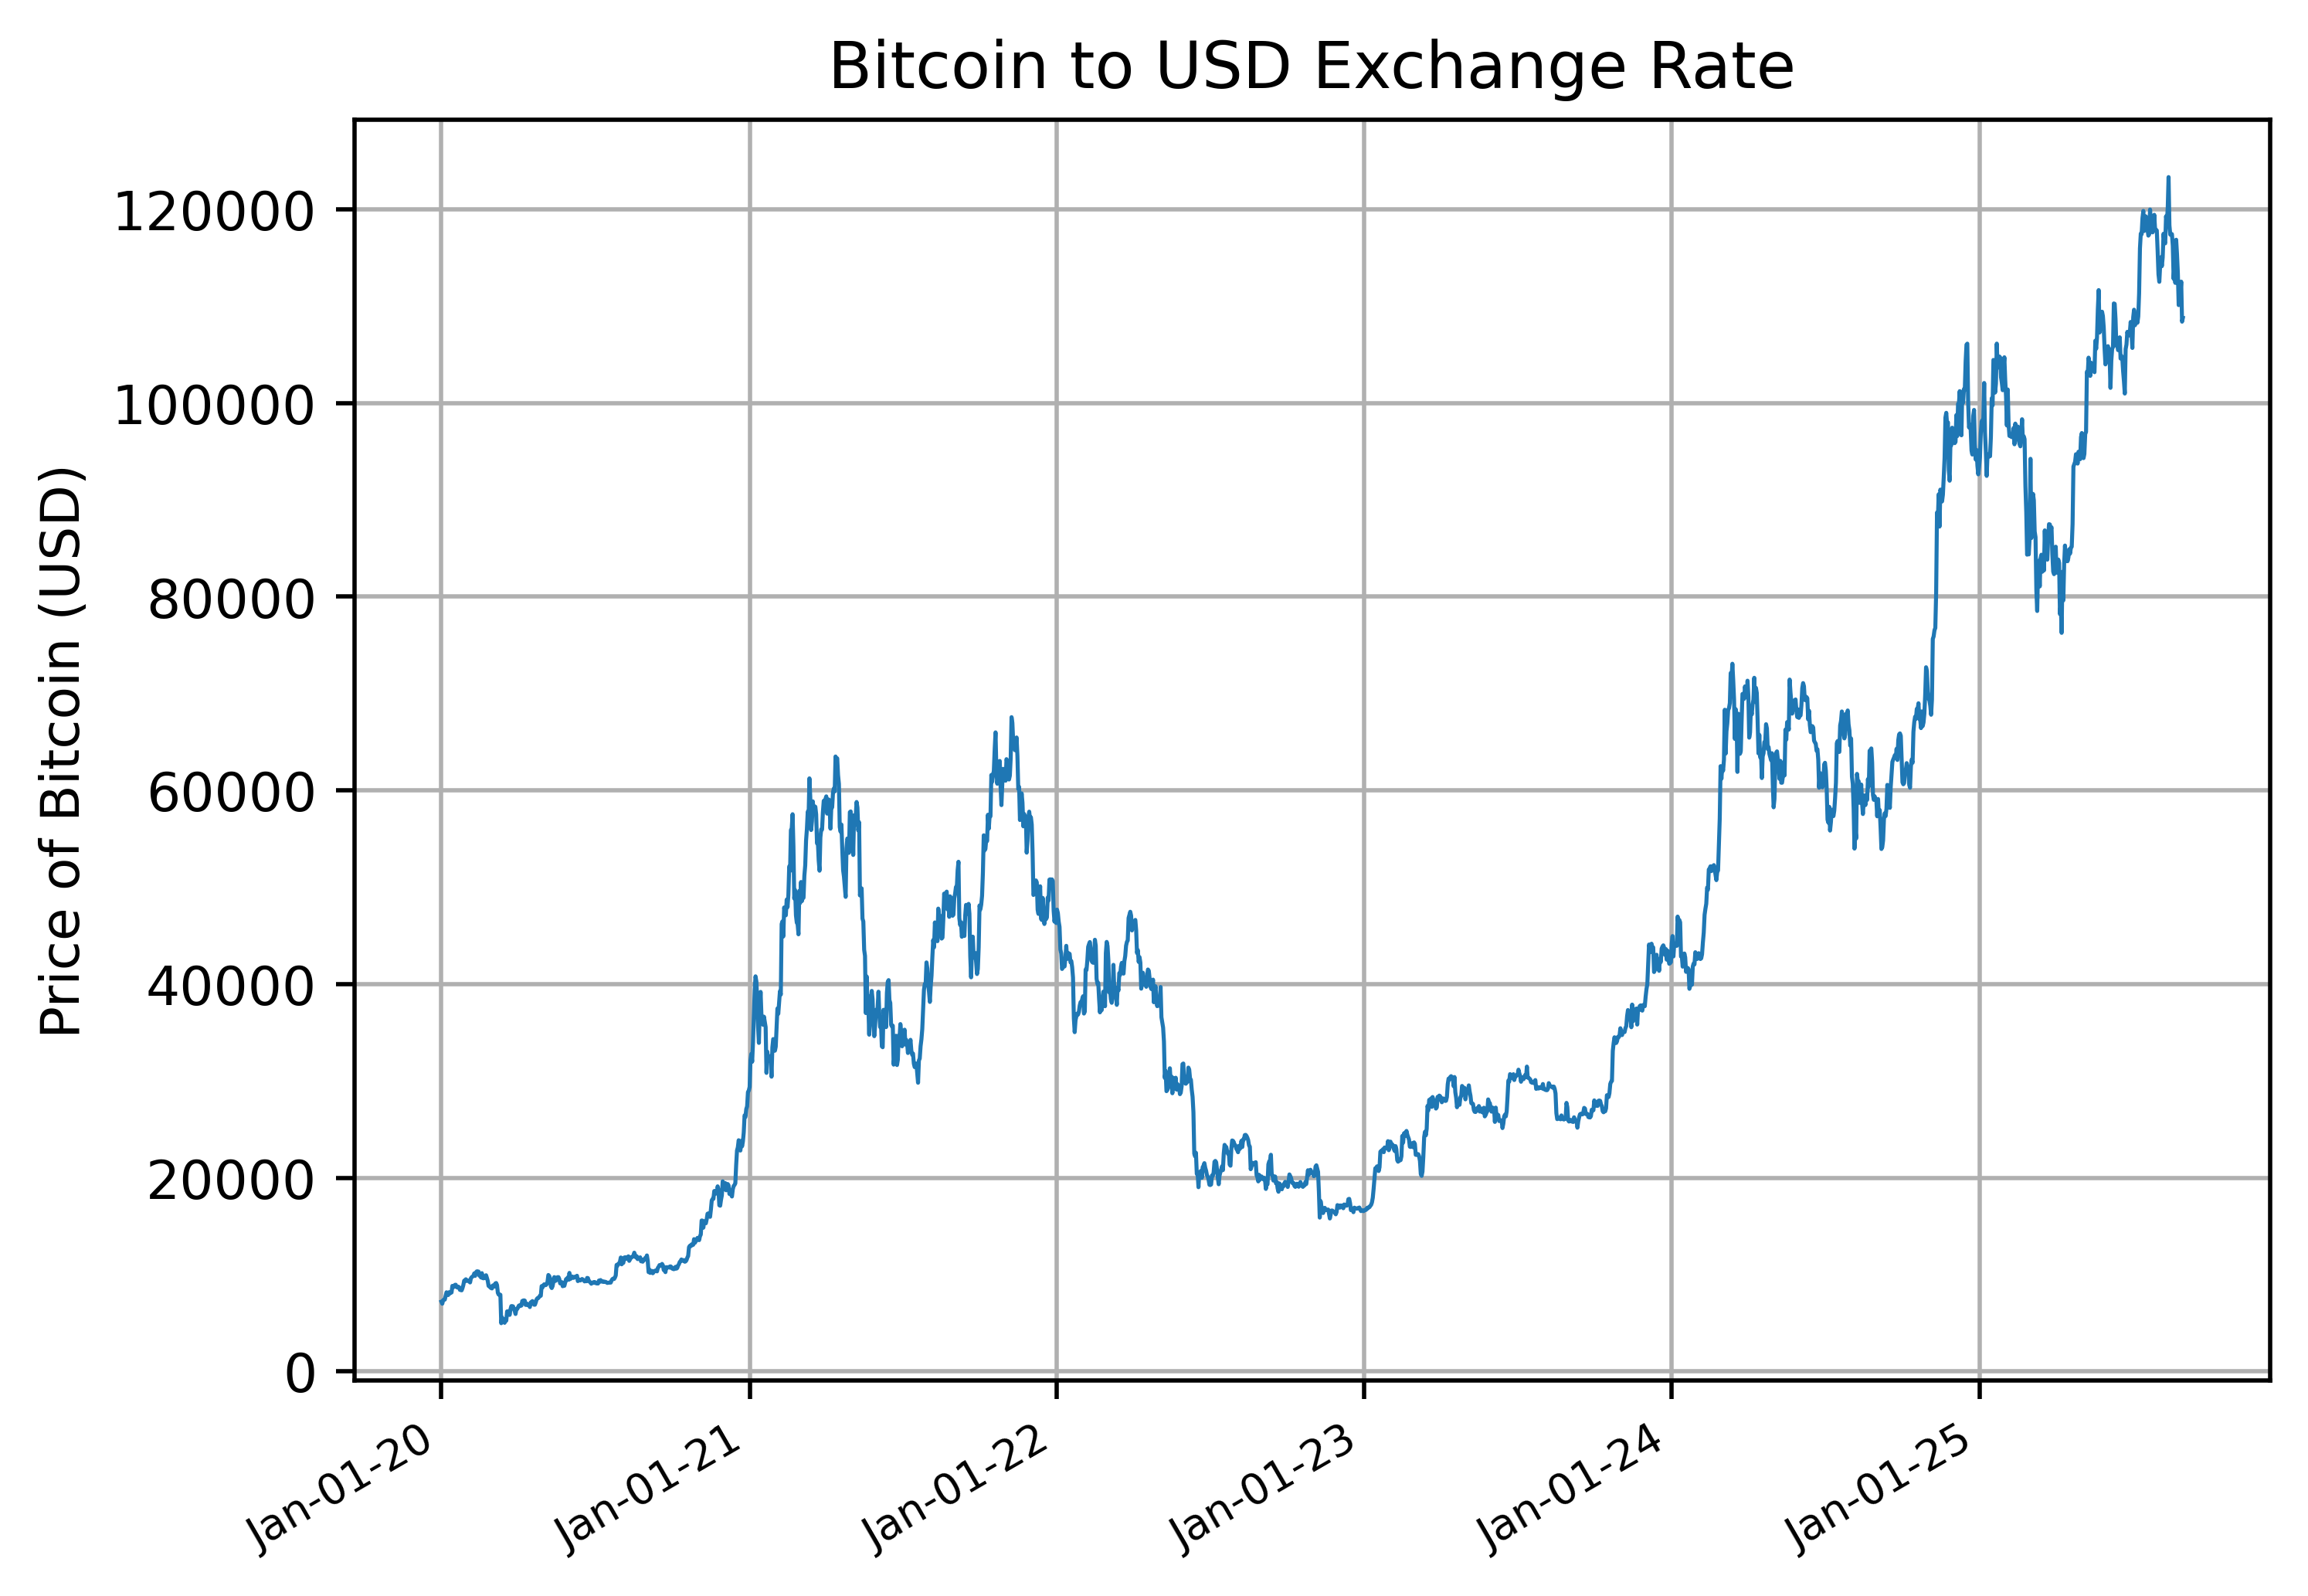

In [39]:
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

In [40]:
 #Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()

In [41]:
 #Compute a 30-day Simple Moving Average with pandas
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

In [42]:
BTC_USD.tail()

Price,Close,High,Low,Open,Volume,SMA_9,SMA_30
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,,
Date,,,,,,,
2025-08-26,111802.656250,112397.015625,108762.039062,110124.101562,69396320317,113712.346354,116003.221094
2025-08-27,111222.062500,112619.414062,110398.265625,111795.710938,62137056409,113153.429688,115779.807292
2025-08-28,112544.804688,113450.078125,110900.921875,111219.054688,58860155962,113121.610243,115600.562500
2025-08-29,108410.835938,112619.054688,107559.625000,112550.523438,77843379644,112470.065104,115286.550781
2025-08-30,108808.070312,108929.351562,107444.445312,108409.406250,51486264208,112068.847222,115054.879687


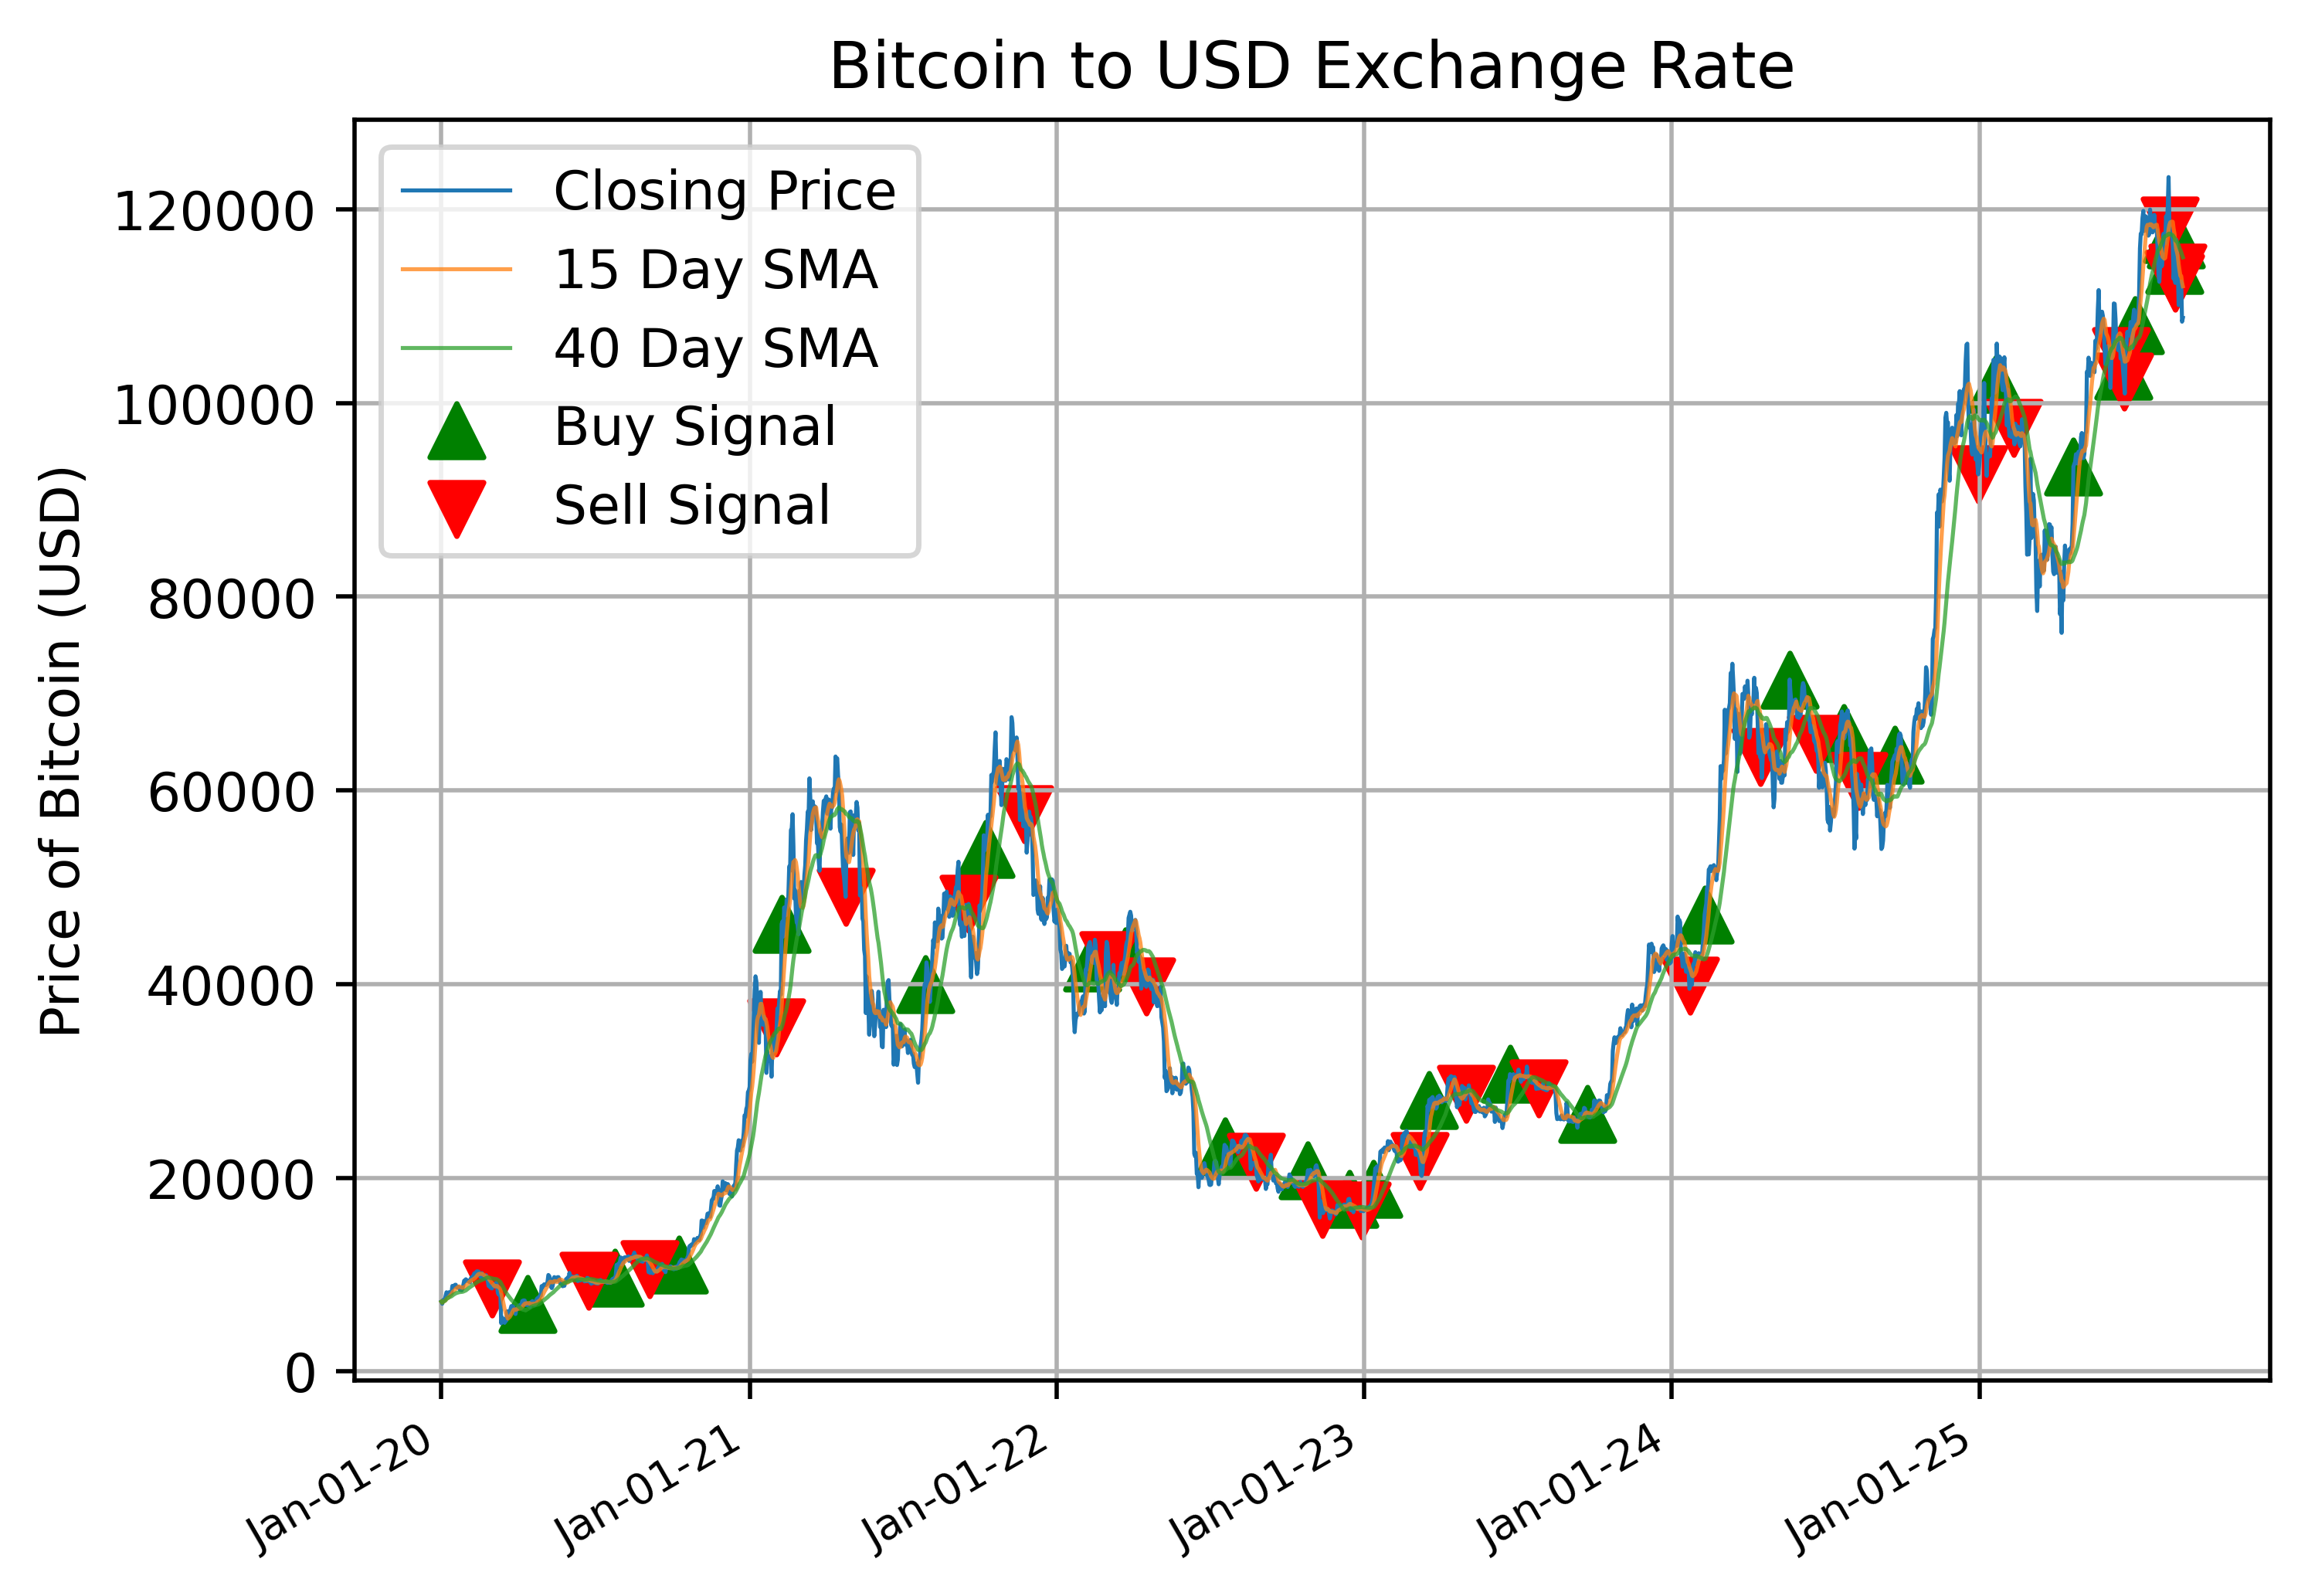

In [43]:
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt

# Create DataFrame with same index
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define intervals (using the previously defined intervals for the initial plot)
short_interval = 15
long_interval = 40

# Compute SMAs
trade_signals['Short_SMA'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long_SMA'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

# Add Close price for reference
trade_signals['Close'] = BTC_USD['Close']

# Generate trading signals: 1 = Buy, -1 = Sell, 0 = Hold
trade_signals['Signal'] = 0
trade_signals.iloc[short_interval:, trade_signals.columns.get_loc('Signal')] = np.where(
    trade_signals['Short_SMA'][short_interval:] > trade_signals['Long_SMA'][short_interval:],
    1,
    -1
)

# Only mark entries at *crossovers* to avoid multiple daily signals
trade_signals['Trade'] = trade_signals['Signal'].diff()


fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='15 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='40 Day SMA')

# Plotting the buy and sell signals
ax.scatter(trade_signals.index[trade_signals['Trade'] == 2],
           trade_signals['Close'][trade_signals['Trade'] == 2],
           marker='^', color='green', label='Buy Signal', s=100, alpha=1)

ax.scatter(trade_signals.index[trade_signals['Trade'] == -2],
           trade_signals['Close'][trade_signals['Trade'] == -2],
           marker='v', color='red', label='Sell Signal', s=100, alpha=1)


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [44]:
import numpy as np
import pandas as pd

# Create DataFrame with same index
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define intervals
short_interval = 15
long_interval = 40

# Compute SMAs
trade_signals['Short_SMA'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long_SMA'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

# Add Close price for reference
trade_signals['Close'] = BTC_USD['Close']

# Generate trading signals: 1 = Buy, -1 = Sell, 0 = Hold
trade_signals['Signal'] = 0
trade_signals.iloc[short_interval:, trade_signals.columns.get_loc('Signal')] = np.where(
    trade_signals['Short_SMA'][short_interval:] > trade_signals['Long_SMA'][short_interval:],
    1,
    -1
)

# Only mark entries at *crossovers* to avoid multiple daily signals
trade_signals['Trade'] = trade_signals['Signal'].diff()

# Trade = +2 → Buy signal, -2 → Sell signal, NaN/0 → No trade
print(trade_signals.tail(20))

                Short_SMA       Long_SMA          Close  Signal  Trade
Date                                                                  
2025-08-11  116164.413542  115868.321875  118731.445312       1    0.0
2025-08-12  116314.308854  116131.445117  120172.906250       1    0.0
2025-08-13  116675.769792  116514.188281  123344.062500       1    0.0
2025-08-14  116710.995833  116767.398242  118359.578125      -1   -2.0
2025-08-15  116820.339063  116971.555273  117398.351562      -1    0.0
2025-08-16  117098.423437  117201.342773  117491.351562      -1    0.0
2025-08-17  117426.833333  117413.912500  117453.062500       1    2.0
2025-08-18  117562.476042  117537.056445  116252.312500       1    0.0
2025-08-19  117413.095833  117458.155859  112831.179688      -1   -2.0
2025-08-20  117421.982292  117377.099609  114274.742188       1    2.0
2025-08-21  117248.051042  117251.694727  112419.031250      -1   -2.0
2025-08-22  117206.530208  117195.643945  116874.085938       1    2.0
2025-0

In [45]:
# Create Position column = difference between consecutive Signal values
trade_signals['Position'] = trade_signals['Signal'].diff()

# Map numeric changes to text labels
trade_signals['Position'] = trade_signals['Position'].map({
    2: 'BUY',
    -2: 'SELL'
})

print(trade_signals.tail(30))


                Short_SMA       Long_SMA          Close  Signal  Trade  \
Date                                                                     
2025-08-01  117705.983333  113636.551953  113320.085938       1    0.0   
2025-08-02  117340.895833  113810.280469  112526.914062       1    0.0   
2025-08-03  117092.742188  114014.581445  114217.671875       1    0.0   
2025-08-04  116944.148438  114207.347070  115071.882812       1    0.0   
2025-08-05  116724.275521  114386.883203  114141.445312       1    0.0   
2025-08-06  116393.114583  114585.372461  115028.000000       1    0.0   
2025-08-07  116309.243750  114839.602344  117496.898438       1    0.0   
2025-08-08  116197.292188  115047.181250  116688.726562       1    0.0   
2025-08-09  116121.590625  115281.306836  116500.359375       1    0.0   
2025-08-10  116212.216667  115621.518750  119306.757812       1    0.0   
2025-08-11  116164.413542  115868.321875  118731.445312       1    0.0   
2025-08-12  116314.308854  116131.4451

# Task
Backtest the trading strategy using the generated buy and sell signals, calculate key performance metrics, optimize the strategy by exploring different moving average intervals, and summarize the findings.

## Backtesting the strategy

### Subtask:
Implement a backtesting simulation to execute trades based on the generated buy and sell signals and calculate the performance of the strategy over the given time period.


**Reasoning**:
Implement the backtesting simulation based on the trading signals, tracking portfolio value over time and calculating the final performance.



In [46]:
# Initialize variables
initial_portfolio_value = 10000
portfolio_value = initial_portfolio_value
shares_held = 0
portfolio_history = []

# Iterate through trade signals and simulate trading
for index, row in trade_signals.iterrows():
    # Check for buy signal
    if row['Trade'] == 2:
        # Buy as many shares as possible with the current portfolio value
        shares_to_buy = portfolio_value / row['Close']
        shares_held += shares_to_buy
        portfolio_value -= shares_to_buy * row['Close']

    # Check for sell signal
    elif row['Trade'] == -2:
        # Sell all held shares
        portfolio_value += shares_held * row['Close']
        shares_held = 0

    # Calculate current portfolio value (cash + value of held shares)
    current_portfolio_value = portfolio_value + shares_held * row['Close']
    portfolio_history.append(current_portfolio_value)

# Create a pandas Series for portfolio performance
portfolio_performance = pd.Series(portfolio_history, index=trade_signals.index)

# Print the final portfolio value
print(f"Initial Portfolio Value: ${initial_portfolio_value:,.2f}")
print(f"Final Portfolio Value: ${portfolio_performance.iloc[-1]:,.2f}")

Initial Portfolio Value: $10,000.00
Final Portfolio Value: $122,316.13


## Calculate key metrics

Computation of relevant financial metrics to evaluate the strategy's performance, such as total return, win rate, and drawdown.


**Reasoning**:
Compute total return, win rate, and drawdown to evaluate the strategy's performance.



In [47]:
# 1. Calculate Total Return
total_return = (portfolio_performance.iloc[-1] - initial_portfolio_value) / initial_portfolio_value * 100
print(f"Total Return: {total_return:.2f}%")

# 2. Determine winning and losing trades
buy_prices = trade_signals[trade_signals['Trade'] == 2]['Close']
sell_prices = trade_signals[trade_signals['Trade'] == -2]['Close']

# Ensure we have matching buy and sell signals for trade outcomes
trades = pd.DataFrame({'Buy_Price': buy_prices.values, 'Sell_Price': sell_prices.values[:len(buy_prices)]})
trades['Outcome'] = np.where(trades['Sell_Price'] > trades['Buy_Price'], 'Win', 'Loss')

winning_trades = trades[trades['Outcome'] == 'Win'].shape[0]
losing_trades = trades[trades['Outcome'] == 'Loss'].shape[0]
total_trades = winning_trades + losing_trades

# 3. Calculate Win Rate
win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0
print(f"Win Rate: {win_rate:.2f}%")

# 4. Calculate Maximum Drawdown
peak = portfolio_performance.expanding(min_periods=1).max()
drawdown = (portfolio_performance - peak) / peak
max_drawdown = drawdown.min() * 100
print(f"Maximum Drawdown: {max_drawdown:.2f}%")

Total Return: 1123.16%
Win Rate: 34.62%
Maximum Drawdown: -44.98%


## Optimize the strategy

Exploration of different combinations of short and long moving average intervals to find the parameters that yield the best performance based on the calculated metrics.


**Reasoning:**
Iterate through different combinations of short and long moving average intervals and run the backtesting function for each combination. Store the results in a DataFrame to compare the performance of different parameter sets.

In [48]:
import numpy as np
import pandas as pd

def backtest_strategy(df, short_interval, long_interval, initial_portfolio_value=10000):
    """
    Backtests the SMA crossover strategy and calculates performance metrics.

    Args:
        df (pd.DataFrame): DataFrame with 'Close' prices.
        short_interval (int): The lookback period for the short moving average.
        long_interval (int): The lookback period for the long moving average.
        initial_portfolio_value (float): The initial portfolio value for backtesting.

    Returns:
        dict: A dictionary containing performance metrics (Total Return, Win Rate, Max Drawdown).
    """
    trade_signals = pd.DataFrame(index=df.index)
    trade_signals['Close'] = df['Close']
    trade_signals['Short_SMA'] = df['Close'].rolling(window=short_interval, min_periods=1).mean()
    trade_signals['Long_SMA'] = df['Close'].rolling(window=long_interval, min_periods=1).mean()

    trade_signals['Signal'] = 0
    trade_signals.iloc[long_interval:, trade_signals.columns.get_loc('Signal')] = np.where(
        trade_signals['Short_SMA'][long_interval:] > trade_signals['Long_SMA'][long_interval:],
        1,
        -1
    )
    trade_signals['Trade'] = trade_signals['Signal'].diff()

    portfolio_value = initial_portfolio_value
    shares_held = 0
    portfolio_history = []

    for index, row in trade_signals.iterrows():
        if row['Trade'] == 2:
            shares_to_buy = portfolio_value / row['Close']
            shares_held += shares_to_buy
            portfolio_value -= shares_to_buy * row['Close']
        elif row['Trade'] == -2:
            portfolio_value += shares_held * row['Close']
            shares_held = 0

        current_portfolio_value = portfolio_value + shares_held * row['Close']
        portfolio_history.append(current_portfolio_value)

    portfolio_performance = pd.Series(portfolio_history, index=trade_signals.index)

    # Calculate Metrics
    total_return = (portfolio_performance.iloc[-1] - initial_portfolio_value) / initial_portfolio_value * 100

    buy_prices = trade_signals[trade_signals['Trade'] == 2]['Close']
    sell_prices = trade_signals[trade_signals['Trade'] == -2]['Close']

    # Ensure we have matching buy and sell signals for trade outcomes
    min_len = min(len(buy_prices), len(sell_prices))
    trades = pd.DataFrame({'Buy_Price': buy_prices.values[:min_len], 'Sell_Price': sell_prices.values[:min_len]})
    trades['Outcome'] = np.where(trades['Sell_Price'] > trades['Buy_Price'], 'Win', 'Loss')


    winning_trades = trades[trades['Outcome'] == 'Win'].shape[0]
    losing_trades = trades[trades['Outcome'] == 'Loss'].shape[0]
    total_trades = winning_trades + losing_trades

    win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

    peak = portfolio_performance.expanding(min_periods=1).max()
    drawdown = (portfolio_performance - peak) / peak
    max_drawdown = drawdown.min() * 100

    return {
        'Total Return': total_return,
        'Win Rate': win_rate,
        'Max Drawdown': max_drawdown
    }

# Define ranges for short and long intervals
short_intervals = range(5, 21, 5)  # e.g., 5, 10, 15, 20 days
long_intervals = range(20, 61, 10)   # e.g., 20, 30, 40, 50, 60 days

# Create a list to store the results
optimization_results = []

# Iterate through all combinations of short and long intervals
for short_int in short_intervals:
    for long_int in long_intervals:
        # Ensure long interval is greater than short interval
        if long_int > short_int:
            print(f"Backtesting with Short SMA: {short_int}, Long SMA: {long_int}")
            # Run the backtest
            metrics = backtest_strategy(BTC_USD, short_int, long_int)
            # Store the results
            optimization_results.append({
                'Short_SMA': short_int,
                'Long_SMA': long_int,
                'Total Return (%)': metrics['Total Return'],
                'Win Rate (%)': metrics['Win Rate'],
                'Max Drawdown (%)': metrics['Max Drawdown']
            })

# Convert the results to a DataFrame
optimization_df = pd.DataFrame(optimization_results)

# Display the results
display(optimization_df.sort_values(by='Total Return (%)', ascending=False))

Backtesting with Short SMA: 5, Long SMA: 20
Backtesting with Short SMA: 5, Long SMA: 30
Backtesting with Short SMA: 5, Long SMA: 40
Backtesting with Short SMA: 5, Long SMA: 50
Backtesting with Short SMA: 5, Long SMA: 60
Backtesting with Short SMA: 10, Long SMA: 20
Backtesting with Short SMA: 10, Long SMA: 30
Backtesting with Short SMA: 10, Long SMA: 40
Backtesting with Short SMA: 10, Long SMA: 50
Backtesting with Short SMA: 10, Long SMA: 60
Backtesting with Short SMA: 15, Long SMA: 20
Backtesting with Short SMA: 15, Long SMA: 30
Backtesting with Short SMA: 15, Long SMA: 40
Backtesting with Short SMA: 15, Long SMA: 50
Backtesting with Short SMA: 15, Long SMA: 60
Backtesting with Short SMA: 20, Long SMA: 30
Backtesting with Short SMA: 20, Long SMA: 40
Backtesting with Short SMA: 20, Long SMA: 50
Backtesting with Short SMA: 20, Long SMA: 60


,Short_SMA,Long_SMA,Total Return (%),Win Rate (%),Max Drawdown (%)
7,10,40,1482.171394,28.000000,-52.250112
2,5,40,1462.557094,29.032258,-63.373100
8,10,50,1402.958953,31.818182,-48.474811
3,5,50,1379.021962,28.571429,-54.606754
4,5,60,1256.303294,48.000000,-58.164732
18,20,60,1231.273175,31.578947,-48.137400
12,15,40,1123.161261,34.615385,-44.983076
9,10,60,983.456897,36.363636,-49.743554
14,15,60,959.528491,31.578947,-45.026321
1,5,30,822.142771,29.166667,-65.533132


## Summary findings



In [49]:
# Find the row with the highest Total Return
best_strategy = optimization_df.loc[optimization_df['Total Return (%)'].idxmax()]

print("--- Optimization Summary ---")
print(f"Best Performing Strategy:")
print(f"Short SMA: {int(best_strategy['Short_SMA'])}")
print(f"Long SMA: {int(best_strategy['Long_SMA'])}")
print(f"Total Return: {best_strategy['Total Return (%)']:.2f}%")
print(f"Win Rate: {best_strategy['Win Rate (%)']:.2f}%")
print(f"Maximum Drawdown: {best_strategy['Max Drawdown (%)']:.2f}%")

print("\n--- All Optimization Results (Sorted by Total Return) ---")
display(optimization_df.sort_values(by='Total Return (%)', ascending=False))

--- Optimization Summary ---
Best Performing Strategy:
Short SMA: 10
Long SMA: 40
Total Return: 1482.17%
Win Rate: 28.00%
Maximum Drawdown: -52.25%

--- All Optimization Results (Sorted by Total Return) ---


,Short_SMA,Long_SMA,Total Return (%),Win Rate (%),Max Drawdown (%)
7,10,40,1482.171394,28.000000,-52.250112
2,5,40,1462.557094,29.032258,-63.373100
8,10,50,1402.958953,31.818182,-48.474811
3,5,50,1379.021962,28.571429,-54.606754
4,5,60,1256.303294,48.000000,-58.164732
18,20,60,1231.273175,31.578947,-48.137400
12,15,40,1123.161261,34.615385,-44.983076
9,10,60,983.456897,36.363636,-49.743554
14,15,60,959.528491,31.578947,-45.026321
1,5,30,822.142771,29.166667,-65.533132


**Reasoning:**
Iterate through different combinations of short and long moving average intervals and run the backtesting function for each combination. Store the results in a DataFrame to compare the performance of different parameter sets.

In [50]:
# Define ranges for short and long intervals
short_intervals = range(5, 21, 5)  # e.g., 5, 10, 15, 20 days
long_intervals = range(20, 61, 10)   # e.g., 20, 30, 40, 50, 60 days

# Create a list to store the results
optimization_results = []

# Iterate through all combinations of short and long intervals
for short_int in short_intervals:
    for long_int in long_intervals:
        # Ensure long interval is greater than short interval
        if long_int > short_int:
            print(f"Backtesting with Short SMA: {short_int}, Long SMA: {long_int}")
            # Run the backtest
            metrics = backtest_strategy(BTC_USD, short_int, long_int)
            # Store the results
            optimization_results.append({
                'Short_SMA': short_int,
                'Long_SMA': long_int,
                'Total Return (%)': metrics['Total Return'],
                'Win Rate (%)': metrics['Win Rate'],
                'Max Drawdown (%)': metrics['Max Drawdown']
            })

# Convert the results to a DataFrame
optimization_df = pd.DataFrame(optimization_results)

# Display the results
display(optimization_df.sort_values(by='Total Return (%)', ascending=False))

Backtesting with Short SMA: 5, Long SMA: 20
Backtesting with Short SMA: 5, Long SMA: 30
Backtesting with Short SMA: 5, Long SMA: 40
Backtesting with Short SMA: 5, Long SMA: 50
Backtesting with Short SMA: 5, Long SMA: 60
Backtesting with Short SMA: 10, Long SMA: 20
Backtesting with Short SMA: 10, Long SMA: 30
Backtesting with Short SMA: 10, Long SMA: 40
Backtesting with Short SMA: 10, Long SMA: 50
Backtesting with Short SMA: 10, Long SMA: 60
Backtesting with Short SMA: 15, Long SMA: 20
Backtesting with Short SMA: 15, Long SMA: 30
Backtesting with Short SMA: 15, Long SMA: 40
Backtesting with Short SMA: 15, Long SMA: 50
Backtesting with Short SMA: 15, Long SMA: 60
Backtesting with Short SMA: 20, Long SMA: 30
Backtesting with Short SMA: 20, Long SMA: 40
Backtesting with Short SMA: 20, Long SMA: 50
Backtesting with Short SMA: 20, Long SMA: 60


,Short_SMA,Long_SMA,Total Return (%),Win Rate (%),Max Drawdown (%)
7,10,40,1482.171394,28.000000,-52.250112
2,5,40,1462.557094,29.032258,-63.373100
8,10,50,1402.958953,31.818182,-48.474811
3,5,50,1379.021962,28.571429,-54.606754
4,5,60,1256.303294,48.000000,-58.164732
18,20,60,1231.273175,31.578947,-48.137400
12,15,40,1123.161261,34.615385,-44.983076
9,10,60,983.456897,36.363636,-49.743554
14,15,60,959.528491,31.578947,-45.026321
1,5,30,822.142771,29.166667,-65.533132


In [51]:
def backtest_strategy(df, short_interval, long_interval, initial_portfolio_value=10000):
    """
    Backtests the SMA crossover strategy and calculates performance metrics.

    Args:
        df (pd.DataFrame): DataFrame with 'Close' prices.
        short_interval (int): The lookback period for the short moving average.
        long_interval (int): The lookback period for the long moving average.
        initial_portfolio_value (float): The initial portfolio value for backtesting.

    Returns:
        dict: A dictionary containing performance metrics (Total Return, Win Rate, Max Drawdown).
    """
    trade_signals = pd.DataFrame(index=df.index)
    trade_signals['Close'] = df['Close']
    trade_signals['Short_SMA'] = df['Close'].rolling(window=short_interval, min_periods=1).mean()
    trade_signals['Long_SMA'] = df['Close'].rolling(window=long_interval, min_periods=1).mean()

    trade_signals['Signal'] = 0
    trade_signals.iloc[long_interval:, trade_signals.columns.get_loc('Signal')] = np.where(
        trade_signals['Short_SMA'][long_interval:] > trade_signals['Long_SMA'][long_interval:],
        1,
        -1
    )
    trade_signals['Trade'] = trade_signals['Signal'].diff()

    portfolio_value = initial_portfolio_value
    shares_held = 0
    portfolio_history = []

    for index, row in trade_signals.iterrows():
        if row['Trade'] == 2:
            shares_to_buy = portfolio_value / row['Close']
            shares_held += shares_to_buy
            portfolio_value -= shares_to_buy * row['Close']
        elif row['Trade'] == -2:
            portfolio_value += shares_held * row['Close']
            shares_held = 0

        current_portfolio_value = portfolio_value + shares_held * row['Close']
        portfolio_history.append(current_portfolio_value)

    portfolio_performance = pd.Series(portfolio_history, index=trade_signals.index)

    # Calculate Metrics
    total_return = (portfolio_performance.iloc[-1] - initial_portfolio_value) / initial_portfolio_value * 100

    buy_prices = trade_signals[trade_signals['Trade'] == 2]['Close']
    sell_prices = trade_signals[trade_signals['Trade'] == -2]['Close']

    # Ensure we have matching buy and sell signals for trade outcomes
    min_len = min(len(buy_prices), len(sell_prices))
    trades = pd.DataFrame({'Buy_Price': buy_prices.values[:min_len], 'Sell_Price': sell_prices.values[:min_len]})
    trades['Outcome'] = np.where(trades['Sell_Price'] > trades['Buy_Price'], 'Win', 'Loss')


    winning_trades = trades[trades['Outcome'] == 'Win'].shape[0]
    losing_trades = trades[trades['Outcome'] == 'Loss'].shape[0]
    total_trades = winning_trades + losing_trades

    win_rate = (winning_trades / total_trades) * 100 if total_trades > 0 else 0

    peak = portfolio_performance.expanding(min_periods=1).max()
    drawdown = (portfolio_performance - peak) / peak
    max_drawdown = drawdown.min() * 100

    return {
        'Total Return': total_return,
        'Win Rate': win_rate,
        'Max Drawdown': max_drawdown
    }